<a href="https://colab.research.google.com/github/dyjdlopez/ece-data-workshop-2022/blob/main/Week2-3/ece_special_sda02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sensor Data Analytics II: Data Engineering
$\text{Ⓒ D.J.D. Lopez 2022}$

![image](https://datachannel.co/wp-content/uploads/2019/11/etl-Process.jpg)

# Extraction - Transform - Load Process
The ETL process describes an end-to-end process by which a company utilizes data. It covers from acquiring data to its actual applications. It can also be described as a pipeline used to collect data.

ref: 
*   [Google: What is ETL?](https://www.bing.com/search?q=etl&cvid=a94bc6fdc85c4014aac2fd7fbaecb738&aqs=edge..69i57j0l8.1148j0j1&pglt=419&FORM=ANNTA1&PC=LCTS)
*   [Azure: Extract, Transform, and Load (ETL)]((https://learn.microsoft.com/en-us/azure/architecture/data-guide/relational-data/etl)






## 1. Extraction
This layer is responsible for retrieving/extracting data from one or more sources.
![image](https://cdn4.iconfinder.com/data/icons/web-hosting-13/512/Data_filter-256.png)

We will simulate how raw data is recovered from sensors. The data will not be in a structured form (i.e. tabular). With this type of data, its elements cannot be easily extracted. Unlike in tabular form where we have indexes, extraction for analysis on the raw file may not be possible. However, if there is an observable pattern in the data, we may utilize data augmentation processes for easier analysis. 

In [1]:
# Python has a built in function "open" for extracting data from *.txt files
  # 'r' is for reading text
  # 'w' is for writing text
  # 'a' is for appending text

f = open("data/naia-observatory-example.txt", "r")
weather_text = f.read()
f.close()
print(weather_text)

*-*-*-*- Welcome to Dummy NAIA Weather Observatory -*-*-*-*
-->>> Initiating Power System Operation <<<--
>> 2017-1-1 RAINFALL:0 TMAX:31.931 TMIN:23.6 TMEAN:27.765500000000003 WNDSPD:3 WNDDR:80
>> 2017-1-2 RAINFALL:0 TMAX:31 TMIN:24.6 TMEAN:27.8 WNDSPD:2 WNDDR:70
>> 2017-1-3 RAINFALL:0 TMAX:32.5 TMIN:25.2 TMEAN:28.85 WNDSPD:3 WNDDR:80
>> 2017-1-4 RAINFALL:T TMAX:nan TMIN:24.2 TMEAN:nan WNDSPD:2 WNDDR:100
>> 2017-1-5 RAINFALL:0.45 TMAX:nan TMIN:22.78 TMEAN:nan WNDSPD:2 WNDDR:110
>> 2017-1-6 RAINFALL:0 TMAX:nan TMIN:22.8 TMEAN:27.5 WNDSPD:3 WNDDR:100
>> 2017-1-7 RAINFALL:0 TMAX:31.9 TMIN:21.9 TMEAN:26.9 WNDSPD:3 WNDDR:90
>> 2017-1-8 RAINFALL:0 TMAX:29.6 TMIN:nan TMEAN:26.200000000000003 WNDSPD:2 WNDDR:80
>> 2017-1-9 RAINFALL:0 TMAX:31.4 TMIN:nan TMEAN:28.45 WNDSPD:2 WNDDR:100
>> 2017-1-10 RAINFALL:25 TMAX:28.2 TMIN:24.5 TMEAN:26.35 WNDSPD:2 WNDDR:130
>> 2017-1-11 RAINFALL:-2 TMAX:28.9 TMIN:24 TMEAN:26.45 WNDSPD:2 WNDDR:130
>> 2017-1-12 RAINFALL:0 TMAX:29.8 TMIN:23.1 TMEAN:26.450000000000

Now that we have opened the *.txt file successfuly, we cannot simply call each line in the file. To to this we will use a Python Library called *re*. 

This library allows us to search for regular expressions in the file. Regular Expressions (Regex) are series of characters used to check for patterns in a string. 

To learn more about regex: [Regex Standard Library Reference](https://docs.python.org/3/library/re.html#re-syntax)

In [2]:
import re

In [5]:
# The find all possible matches with the string enclcosed double quotes ("") in the sequence
# "\s" matches unicode whitespace characters
# "." matches any character except a new line
# "\n" one-character string containing a new line

day_readings = re.findall("[>>].\s[2].*\n", weather_text) 
len(day_readings)

365

## 2. Transform


Now that we have extracted the data, transformation involves taking the extracted data, cleaning it, and putting it into a common format. In this case, we will transform the data into a DataFrame. 


In Python Programming, a DataFrame is made using the Pandas library. It stores daata into a two-dimensional data structure. It aligns the data in a tabular form with rows and columns.

![image](https://th.bing.com/th/id/R.09e70ad94156c91b516cf6cd1fda4b69?rik=8WMe6aOrIZ9nyQ&pid=ImgRaw&r=0)

Using the output list of the regex function, we can now access individual entries of our raw file by indexing.

In [4]:
day0 = day_readings[0]
day0

'>> 2017-1-1 RAINFALL:0 TMAX:31.931 TMIN:23.6 TMEAN:27.765500000000003 WNDSPD:3 WNDDR:80\n'

We will now attempt to store the data from the list *day_readings* into a [Python Dictionary](https://docs.python.org/3/c-api/dict.html). 

What this does is it will store all the data for date, rainfall, TMAX, TMIN, TMEAN, WNDSPD, and WNDDR in the *dictionary* keys respectively. We will also declare new names for our variables to make it easier to read.

In [38]:
### Create a dictionary to hold the weather data values
weather_dict = {
    'date': [],
    'rainfall': [],
    'temp_max': [],
    'temp_min': [],
    'temp_mean': [],
    'wind_speed': [],
    'wind_dir': []
}

Using the split function, We will look for the character inside the parenthesis
In this case, we will use whitespaces to indicate "split"

In [6]:
day0.split()

['>>',
 '2017-1-1',
 'RAINFALL:0',
 'TMAX:31.931',
 'TMIN:23.6',
 'TMEAN:27.765500000000003',
 'WNDSPD:3',
 'WNDDR:80']

Let us make another dictionary for replacing the variables in our raw data into the readable new names we have in our first *dictinary*.

In [13]:
### Create an association dictionary to map the nomenclatures
word_convert ={
    'RAINFALL':'rainfall',
    'TMAX':'temp_max',
    'TMIN':'temp_min',
    'TMEAN':'temp_mean',
    'WNDSPD':'wind_speed',
    'WNDDR':'wind_dir'
}

In [31]:
day0.split()[2:]
## 1. Drop the first index since it's just a marker symbol
## 2. We want the second index to be stored directly to the dictionary
## 3. for the remaining indices we want to store them to their corresponding names in the dictionary

['RAINFALL:0',
 'TMAX:31.931',
 'TMIN:23.6',
 'TMEAN:27.765500000000003',
 'WNDSPD:3',
 'WNDDR:80']

In [24]:
dummy_weather_dict = weather_dict.copy() ## We'll use a dummy variable for testing

test_day = day0.split()
## 1. Drop the first index since it's just a marker symbol
## 2. We want the second index to be stored directly to the dictionary
dummy_weather_dict['date'].append(test_day[1])

## 3. for the remaining indices we want to store them to their corresponding names in the dictionary
for data in test_day[2:]:
  subdata = data.split(':')
  key = subdata[0]
  val = float(subdata[1])
  
  dummy_weather_dict[word_convert[key]].append(val)

dummy_weather_dict

{'date': ['2017-1-1'],
 'rainfall': [0.0],
 'temp_max': [31.931],
 'temp_min': [23.6],
 'temp_mean': [27.765500000000003],
 'wind_speed': [3.0],
 'wind_dir': [80.0]}

We now have the right process to convert a single input into a dictionary. This data structure can be accesed through key-value pairs. An item has a key and a corresponding value. Thus, key-value pairs.

![image](https://www.programiz.com/sites/tutorial2program/files/python-dictionary.jpg)

Let's try to use the process to convert the whole list of inputs into a dictionary.

In [ ]:
### Now to do it for all data lines
weather_data = weather_dict.copy() # Copy the original dictionary
for reading in day_readings:
  day_data = reading.split()
  ## Store the date
  weather_data['date'].append(day_data[1].strip())
  for data in day_data[2:]:
    subdata = data.split(':')
    key, val = subdata[0], subdata[1].strip()
    weather_data[word_convert[key]].append(val)
weather_data

In [33]:
# Display the keys of the dictionary

weather_data.keys()

dict_keys(['date', 'rainfall', 'temp_max', 'temp_min', 'temp_mean', 'wind_speed', 'wind_dir'])

Now that we have a dictionary containing our data, we can transform the data further into a Pandas DataFrame. 
<br> 
[Pandas](https://pandas.pydata.org/docs/) is another Python Library which enables us to create easy-to-use data structures and data analysis tools such as but not limited to DataFrame (similar to tables).

In converting a *dictionary* to a DataFrame, it autoomatically sets the keys of the dictionary as the column names.

In [40]:
import pandas as pd

weather_df = pd.DataFrame(weather_data)
weather_df.head(5)

,date,rainfall,temp_max,temp_min,temp_mean,wind_speed,wind_dir
0,2017-1-1,0,31.931,23.6,27.765500000000003,3,80
1,2017-1-2,0,31,24.6,27.8,2,70
2,2017-1-3,0,32.5,25.2,28.85,3,80
3,2017-1-4,T,nan,24.2,nan,2,100
4,2017-1-5,0.45,nan,22.78,nan,2,110


One of the fundamental processes in transforming your data is to know the type of data that you have.
<br> 
Pandas DataFrame has a built-in function called dtypes which displays the data types of the items in their respective columns. 

To learn more about data types: [Python Data Types](https://www.w3schools.com/python/python_datatypes.asp)

In [41]:
weather_df.dtypes

date          object
rainfall      object
temp_max      object
temp_min      object
temp_mean     object
wind_speed    object
wind_dir      object
dtype: object

### 2.1 Data Imputation
Imputation of data is the process of replacing values with another value. It is mostly used in handling missing values but it can also be used for other purposes such below.

#### Why is it important to check and impute your data? 
*   Because it may cause problems in training your model given that some libraries for creating models do not have a provision to automatically handle missing data and it can lead to errors. 
*   It may cause distortions in the variable distribution.






In [42]:
### Change the 'T' values in the rainfall to -1
weather_df = weather_df.replace('T', -1)
weather_df.head(5)

,date,rainfall,temp_max,temp_min,temp_mean,wind_speed,wind_dir
0,2017-1-1,0,31.931,23.6,27.765500000000003,3,80
1,2017-1-2,0,31,24.6,27.8,2,70
2,2017-1-3,0,32.5,25.2,28.85,3,80
3,2017-1-4,-1,nan,24.2,nan,2,100
4,2017-1-5,0.45,nan,22.78,nan,2,110


Missing values in the data can be in the form of NaN. In our data, there are entries with the string value "nan" which is equivalent to a missing value. However, Python still recognizes this as a valid entry. To successfuly convert the string "nan" into a *missing value*/*blank* value, we will use another Python Library called [Numpy](https://numpy.org/doc/stable/reference/index.html#reference) or Numerical Python. 

In [44]:
### Check for Nan values
import numpy as np
weather_df = weather_df.replace('nan', np.NaN)
weather_df.head(5)

,date,rainfall,temp_max,temp_min,temp_mean,wind_speed,wind_dir
0,2017-1-1,0,31.931,23.6,27.765500000000003,3,80
1,2017-1-2,0,31,24.6,27.8,2,70
2,2017-1-3,0,32.5,25.2,28.85,3,80
3,2017-1-4,-1,NaN,24.2,NaN,2,100
4,2017-1-5,0.45,NaN,22.78,NaN,2,110


In [46]:
weather_df.isna() # Check whether an entry is missing or not

,date,rainfall,temp_max,temp_min,temp_mean,wind_speed,wind_dir
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,True,False,True,False,False
4,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...
360,False,False,False,False,False,False,False
361,False,False,False,False,False,False,False
362,False,False,False,False,False,False,False
363,False,False,False,False,False,False,False


In [47]:
weather_df.isna().sum() # Collect the total number of missing values per column

date           0
rainfall       0
temp_max      11
temp_min       8
temp_mean     45
wind_speed     0
wind_dir       0
dtype: int64

### 2.2 Data Conversion
It is the process of converting a value from one datatype to another. 

In [48]:
type(weather_df['date'][0])

str

The current datatype of the *date* column entries is string. Since it should be date, we will use the *pd.to_datetime* to convert the entries in the *date* column from string to datetime

In [ ]:
## Convert the date column to have a data type of DateTime then turn them into indices
weather_df['date'] = pd.to_datetime(weather_df['date'])
weather_df = weather_df.set_index('date', drop=True)
weather_df

Now that we have converted the date column into a datetime datatype and turned them into indices, we should also convert the other columns from being an *object* into *float64* datatype. 

In [50]:
## Convert the rest of the values as floats
weather_df = weather_df.apply(pd.to_numeric)
weather_df.head(5)

,rainfall,temp_max,temp_min,temp_mean,wind_speed,wind_dir
date,,,,,,
2017-01-01,0.00,31.931,23.60,27.7655,3,80
2017-01-02,0.00,31.000,24.60,27.8000,2,70
2017-01-03,0.00,32.500,25.20,28.8500,3,80
2017-01-04,-1.00,NaN,24.20,NaN,2,100
2017-01-05,0.45,NaN,22.78,NaN,2,110


In [51]:
weather_df.dtypes

rainfall      float64
temp_max      float64
temp_min      float64
temp_mean     float64
wind_speed      int64
wind_dir        int64
dtype: object

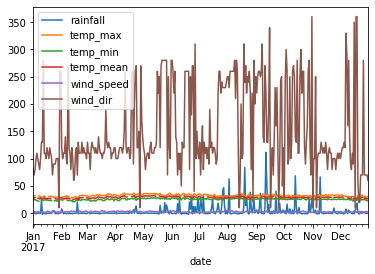

In [52]:
# Plot the cleaned data

weather_df.plot()

## 3. Load
Finally, loading is the process of inserting the formatted data into the target data storage (in this case a comma-separated value file or CSV)

In [54]:
weather_df.to_csv('data/clean_weather_data.csv')